**Numerische Integration von Differentialgleichungen**

Das Eulerverfahren und das Runge-Kutta-Verfahren am Beispiel des freien Falls

Dieses Notebook-Skript ist für Lehrzwecke gedacht.
Es enthält Erklärungen, Herleitungen und Simulationen.

Einleitung
Numerische Methoden werden eingesetzt, wenn Differentialgleichungen keine geschlossene Lösung haben oder wenn Simulationen komplexer technischer Systeme benötigt werden. Hier betrachten wir den freien Fall.

Physikalisches Modell

Mit Luftwiderstand proportional zur Geschwindigkeit:

dv/dt = (1/2 * cw * rho * A / m * v(t)^2 - g)dt


Sowie für die Berechnung der Position

dx/dt = v(t) dt

Wir formulieren jeweils ein Anfangswertproblem.

In [8]:
import numpy as np
import matplotlib.pyplot as plt



# Speicher für Auswertung
times = []
vel_euler = []
pos_euler = []
vel_rk = []
pos_rk = []
vel_analy = []
pos_analy = []

#Fehlerberechnung
d_err_rk_vel = []
d_err_euler_vel = []
de_err_rk_pos = []
de_err_euler_pos = []

class Parameters:
      def __init__(self):
         self.g = 9.81           # Erdbeschleunigung (m/s^2)
         self.cw = 1.1           # Luftwiderstandskoeffizient (1/s) – setze auf 0 für idealen freien Fall
         self.A = 1.0            # Querschnittsfläche (m^2)
         self.rho = 1.225        # Luftdichte (kg/m^3)
         self.m = 80.0           # Masse des fallenden Objekts (kg)
         self.dt = 1.5           # Zeitschritt (s)
         self.t_max = 15.0       # Gesamtdauer der Simulation (s)
         self.v0 = 0.0           # Anfangsgeschwindigkeit (m/s)
         self.x0 = 1000.0        # Anfangshöhe (m)

# Anfangsbedingungen
p = Parameters()
v0_eu = p.v0           # Anfangsgeschwindigkeit (m/s)
x0_eu = p.x0           # Anfangshöhe (m)
v0_rk = p.v0         # Anfangsgeschwindigkeit für Runge-Kutta (m/s)
x0_rk = p.x0         # Anfangshöhe für Runge
v0_ana = p.v0         # Anfangsgeschwindigkeit analytisch (m/s)
x0_ana = p.x0         # Anfangshöhe analytisch (m)
t = 0.0
a = 0.0

Eulerverfahren (Erklärung)
Das Eulerverfahren ist das einfachste numerische Verfahren zur Lösung von Differentialgleichungen. Es approximiert die Lösung durch eine schrittweise lineare Annäherung.

**Grundidee:**
Die Ableitung an einem Punkt gibt die Steigung der Funktion an. Das Eulerverfahren nutzt diese Steigung, um den nächsten Funktionswert zu schätzen:

yₙ₊₁ = yₙ + dt · f(tₙ, yₙ)

Dabei ist:
- yₙ der aktuelle Wert
- dt die Schrittweite
- f(tₙ, yₙ) die Ableitung (die rechte Seite der Differentialgleichung)

**Anwendung auf den freien Fall:**
Für die Geschwindigkeit: dv/dt = a(t, v)
Für die Position: dx/dt = v(t)
**Explizites Eulerverfahren:**

v_{n+1} = v_n + dt * dv/dt(t_n, v_n)

x_{n+1} = x_n + dt * v_n

In [9]:
def euler_step(v_0, x_0, params=Parameters()):
   """
   Einzelschritt des Euler-Verfahrens für den freien Fall mit Luftwiderstand
   Parameter:
       v_0 : Aktuelle Geschwindigkeit (m/s)
       x_0 : Aktuelle Position (m)
       params: Parameter-Objekt mit physikalischen Konstanten
   Returns:
       v_k1: Neue Geschwindigkeit (m/s)
       x_k1: Neue Position (m)
   """
   dt = params.dt
   # Berechnung der neuen Werte mit dem Euler-Verfahren
   ar = 0.5*params.rho*params.A*params.cw*v_0*v_0/params.m 
   a =  ar - params.g               # Beschleunigung mit Luftwiderstand
   v_k1 = v_0 + dt * a              # Update Geschwindigkeit
   x_k1 = x_0 + dt * v_k1           # Update Position
   return v_k1, x_k1

**Runge-Kutta-Verfahren (Erklärung)**

Das Runge-Kutta-Verfahren 4. Ordnung (RK4) ist ein höherwertiges numerisches Verfahren zur Lösung von Differentialgleichungen. Es ist genauer als das Eulerverfahren, da es mehrere Zwischenschritte pro Zeitschritt verwendet.

**Grundidee:**
Statt nur die Steigung am Anfang des Intervalls zu verwenden (wie beim Eulerverfahren), berechnet RK4 vier Steigungen:
- k₁: Steigung am Anfang des Intervalls
- k₂: Steigung in der Mitte (mit k₁ geschätzt)
- k₃: Steigung in der Mitte (mit k₂ geschätzt)
- k₄: Steigung am Ende des Intervalls

**Algorithmus:**

k₁ = f(tₙ, yₙ)

k₂ = f(tₙ + dt/2, yₙ + dt/2 · k₁)

k₃ = f(tₙ + dt/2, yₙ + dt/2 · k₂)

k₄ = f(tₙ + dt, yₙ + dt · k₃)

yₙ₊₁ = yₙ + dt/6 · (k₁ + 2k₂ + 2k₃ + k₄)

**Vorteile gegenüber Euler:**
- Fehler von O(dt⁵) statt O(dt²) pro Schritt
- Deutlich genauer bei gleicher Schrittweite
- Bessere Stabilität bei größeren Zeitschritten

In [10]:
def rk4_step(f, x0, y0, params=Parameters()):
   """
   4th‑order Runge–Kutta solver for dx/dt = f(t, x0, y0)
   
   Parameter:
       f     : Funktion f(t, x) returning derivative
       x0    : Initialwert 
       y0    : Initialwert der Ableitung
       
   Returns:
       x: Lösung für den nächsten Zeitschritt
   """
   x = x0
   h = params.dt

       
   k1 = f(x, y0, params)
   k2 = f(x + 0.5*h*k1, y0, params)
   k3 = f(x + 0.5*h*k2, y0, params)
   k4 = f(x + h*k3, y0, params)

   kg = (k1 + 2*k2 + 2*k3 + k4)/6.0

   x = x + h * kg

   return x

def freefall_firstderiv(x,y, params=Parameters()):
   """
   Erste Ableitung der Geschwindigkeit im freien Fall mit Luftwiderstand
   Parameter:
      x: Geschwindigkeit (m/s)
      y: Nicht benutzt
      params: Parameter-Objekt mit physikalischen Konstanten
   Returns:
      Beschleunigung (a) zum Zeitpunkt t
   """
   v = x
   ar = 0.5*params.rho*params.A*params.cw*v*v/params.m 
   a =  ar - params.g  # Beschleunigung mit Luftwiderstand
   return a

def freefall_secondderiv(x,y, params = Parameters()):
   """
   Zweite Ableitung der Position im freien Fall mit Luftwiderstand
   Parameter:
      x: Position (m)
      y: Geschwindigkeit (m/s)
      params: Parameter-Objekt mit physikalischen Konstanten
   Returns:
      Geschwindigkeit (v) zum Zeitpunkt t
   """
   v =  y  #Geschwindigkeit
   return v

Sonderfall hier eindeutige Lösung der Ricattigleichung:

In [11]:
def analytical_solution_vel(t, params=Parameters()):
   """
   Analytische Lösung der Geschwindigkeit im freien Fall mit Luftwiderstand
   Parameter: 
      t: Zeitpunkt (t)
      params: Parameter-Objekt mit physikalischen Konstanten
   Returns:
      Geschwindigkeit (v) zum Zeitpunkt t
   """ 
   if t < params.dt:
      return p.v0
   c2 = params.g
   c1 = 0.5 * params.rho * params.A * params.cw / params.m

   v = - (np.sqrt(c2) * np.tanh(c1 * np.sqrt(c1 * c2) +np.sqrt(c1 * c2) *t ))/np.sqrt(c1) + p.v0
   return v

def analytical_solution_pos(t, params=Parameters()):
   """
   Analytische Lösung der Position im freien Fall mit Luftwiderstand
   Parameter: 
      t: Zeitpunkt (t)
      params: Parameter-Objekt mit physikalischen Konstanten
   Returns:
      Position (x) zum Zeitpunkt t
   """   
   if t < params.dt:
      return p.x0

   c2 = params.g
   c1 = 0.5 * params.rho * params.A * params.cw / params.m

   x = (c2) - np.log(np.cosh(np.sqrt(c1 * c2) *(c1 +  t)))/c1 + p.x0
   return x

**Hauptprogrammschleife**

In [12]:
##############################
# Main Program
################################

# Parameter
t_max = p.t_max     # Gesamtdauer der Simulation (s)

###################################
# Simulationsschleife

while t <= t_max and x0_eu >= 0:
   # Speichern
   times.append(t)
   vel_euler.append(v0_eu)
   pos_euler.append(x0_eu)

   vel_rk.append(v0_rk)  
   pos_rk.append(x0_rk)      

   vel_analy.append(analytical_solution_vel(t))
   pos_analy.append(analytical_solution_pos(t))

   # Fehlerberechnung
   d_err_euler_vel.append(abs(v0_eu - v0_ana))
   d_err_rk_vel.append(abs(v0_rk - v0_ana))
   de_err_euler_pos.append(abs(x0_eu - x0_ana))
   de_err_rk_pos.append(abs(x0_rk - x0_ana))

   
   # Euler-Schritt: Berechnung der neuen Werte
   v0_eu, x0_eu = euler_step(v0_eu, x0_eu, p)
   # Runge-Kutta-Schritt: Berechnung der neuen Werte
   v0_rk = rk4_step(freefall_firstderiv, v0_rk,a, p)
   x0_rk = rk4_step(freefall_secondderiv, x0_rk,v0_rk,p)

   
   t += p.dt
   #calc analytical solution one step ahead
   v0_ana = analytical_solution_vel(t, p)
   x0_ana = analytical_solution_pos(t, p)

**Darstellung der Ergebnisse**

Simulation abgeschlossen.
Letzte Position Euler: 480.20 m
Letzte Geschwindigkeit Euler: -34.13 m/s
Letzte Position Runge-Kutta: 495.58 m
Letzte Geschwindigkeit Runge-Kutta: -34.12 m/s
Letzte Position Analytisch: 528.68 m
Letzte Geschwindigkeit Analytisch: -34.12 m/s
Simulationsschritte: 11


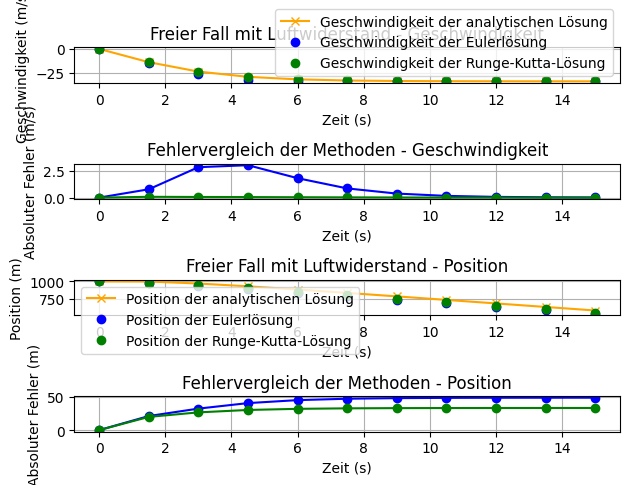

In [13]:
# Ausgabe
print("Simulation abgeschlossen.")
print(f"Letzte Position Euler: {x0_eu:.2f} m")
print(f"Letzte Geschwindigkeit Euler: {v0_eu:.2f} m/s")
print(f"Letzte Position Runge-Kutta: {x0_rk:.2f} m")
print(f"Letzte Geschwindigkeit Runge-Kutta: {v0_rk:.2f} m/s")
print(f"Letzte Position Analytisch: {x0_ana:.2f} m")
print(f"Letzte Geschwindigkeit Analytisch: {v0_ana:.2f} m/s")
print(f"Simulationsschritte: {len(times)}")

# Optional: kurze Textausgabe der ersten Werte
#plot in matplotlib
fig, axes = plt.subplots(4, 1,)  # 2 rows, 1 column
axes[0].plot(times, vel_analy, '-x', label='Geschwindigkeit der analytischen Lösung',color='orange')
axes[0].plot(times, vel_euler, 'o', label='Geschwindigkeit der Eulerlösung',color='blue')
axes[0].plot(times, vel_rk, 'o', label='Geschwindigkeit der Runge-Kutta-Lösung',color='green')
axes[0].set_title('Freier Fall mit Luftwiderstand - Geschwindigkeit')
axes[0].set_ylabel('Geschwindigkeit (m/s)')
axes[0].set_xlabel('Zeit (s)')
axes[0].grid()
axes[0].legend()
axes[1].plot(times, d_err_euler_vel, '-o', label='Fehler Euler',color='blue')
axes[1].plot(times, d_err_rk_vel, '-o', label='Fehler Runge-Kutta',color='green')
axes[1].set_title('Fehlervergleich der Methoden - Geschwindigkeit')
axes[1].set_xlabel('Zeit (s)')
axes[1].set_ylabel('Absoluter Fehler (m/s)')
axes[1].grid()
axes[2].plot(times, pos_analy, '-x', label='Position der analytischen Lösung',color='orange')
axes[2].plot(times, pos_euler, 'o', label='Position der Eulerlösung',color='blue')
axes[2].plot(times, pos_rk, 'o', label='Position der Runge-Kutta-Lösung',color='green')
axes[2].legend()
axes[2].set_title('Freier Fall mit Luftwiderstand - Position')
axes[2].set_ylabel('Position (m)')
axes[2].set_xlabel('Zeit (s)')
axes[2].grid()
axes[3].plot(times, de_err_euler_pos, '-o', label='Fehler Euler', color='blue')
axes[3].plot(times, de_err_rk_pos, '-o', label='Fehler Runge-Kutta', color='green')
axes[3].set_title('Fehlervergleich der Methoden - Position')
axes[3].set_xlabel('Zeit (s)')
axes[3].set_ylabel('Absoluter Fehler (m)')
axes[3].grid()
plt.tight_layout()
plt.show()

**Darstellung des Einflusses der Zeitschritte**
Der Zeitschritt dt ist ein kritischer Parameter bei der numerischen Lösung von Differentialgleichungen:

**Einfluss auf die Genauigkeit:**
- **Kleinere Zeitschritte (dt → 0):** Führen zu genaueren Ergebnissen, da die Diskretisierung der kontinuierlichen Lösung feiner wird. Der Fehler pro Schritt nimmt ab.
- **Größere Zeitschritte:** Vergrößern den Diskretisierungsfehler. Die numerische Lösung weicht stärker von der analytischen Lösung ab.

**Einfluss auf die Stabilität:**
- Bei zu großen Zeitschritten kann das numerische Verfahren instabil werden und zu unrealistischen Ergebnissen führen (z.B. oszillierende oder divergierende Lösungen).
- Das Eulerverfahren ist besonders anfällig für Instabilitäten bei großen Zeitschritten.

**Einfluss auf die Rechenzeit:**
- Kleinere Zeitschritte bedeuten mehr Iterationen für die gleiche Simulationsdauer → längere Rechenzeit.
- Es besteht ein Trade-off zwischen Genauigkeit und Rechenaufwand.

**Fehlerakkumulation:**
- Der lokale Fehler (Fehler pro Schritt) ist beim Eulerverfahren proportional zu dt².
- Der globale Fehler (Gesamtfehler nach vielen Schritten) ist proportional zu dt.
- Bei Runge-Kutta-Verfahren 4. Ordnung ist der lokale Fehler proportional zu dt⁵ und der globale Fehler proportional zu dt⁴.

In der folgenden Analyse wird dieser Effekt durch Variation von dt demonstriert:

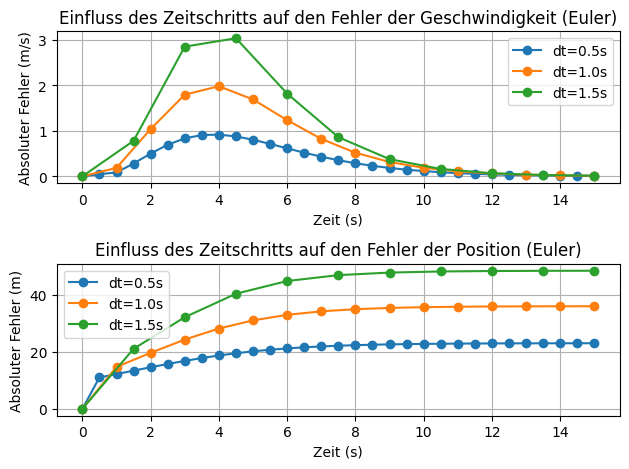

In [14]:
# Darstellung des Einflusses des Zeitschritts auf die Genauigkeit der Simulation
fig1,ax = plt.subplots(2,1)

for dt_test in [0.5, 1.0, 1.5]:
   # Anfangsbedingungen
   p.dt = dt_test
   v0_eu = p.v0           # Anfangsgeschwindigkeit (m/s)
   x0_eu = p.x0           # Anfangshöhe (m)
   v0_ana = p.v0         # Anfangsgeschwindigkeit analytisch (m/s)
   x_ana = p.x0         # Anfangshöhe analytisch (m)
   t = 0.0
   a = 0.0
   ###################################
   # Simulationsschleife

   times = []
   d_err_euler_vel = []
   de_err_euler_pos = []
   while t <= t_max and x0_eu >= 0:
      # Speichern
      times.append(t)
      vel_euler.append(v0_eu)
      pos_euler.append(x0_eu)

      # Fehlerberechnung
      d_err_euler_vel.append(abs(v0_eu - v0_ana))
      de_err_euler_pos.append(abs(x0_eu - x_ana))

      # Euler-Schritt: Berechnung der neuen Werte
      v0_eu, x0_eu = euler_step(v0_eu, x0_eu, p)

      t += p.dt
      #calc analytical solution one step ahead
      v0_ana = analytical_solution_vel(t, p)
      x_ana = analytical_solution_pos(t, p)
   ax[0].plot(times, d_err_euler_vel, '-o', label=f'dt={dt_test}s')
   ax[0].set_title('Einfluss des Zeitschritts auf den Fehler der Geschwindigkeit (Euler)')
   ax[0].set_xlabel('Zeit (s)')
   ax[0].set_ylabel('Absoluter Fehler (m/s)')
   ax[0].grid()
   ax[0].legend()
   ax[1].plot(times, de_err_euler_pos, '-o', label=f'dt={dt_test}s')
   ax[1].set_title('Einfluss des Zeitschritts auf den Fehler der Position (Euler)')
   ax[1].set_xlabel('Zeit (s)')
   ax[1].set_ylabel('Absoluter Fehler (m)')
   ax[1].grid()
   ax[1].legend()
plt.tight_layout()
plt.show()

Diskussion der Ergebnisse:

- Ohne Luftwiderstand steigt die Geschwindigkeit linear.
- Mit Luftwiderstand nähert sich die Geschwindigkeit einer Endgeschwindigkeit.
- Das Eulerverfahren ist einfach, aber die Genauigkeit hängt stark vom Zeitschritt ab.
- Kleine Zeitschritte → genauer, aber langsamer.
- In technischen Systemen sind höherwertige Verfahren wie Runge-Kutta üblich.

Reflexionsfragen:

1. Was passiert, wenn Sie dt vergrößern?
2. Wie beeinflusst der Parameter c die Endgeschwindigkeit?
3. Welche Einschränkungen hat das Eulerverfahren?
4. Wie könnte ein Verfahren mit adaptiver Schrittweite aussehen?